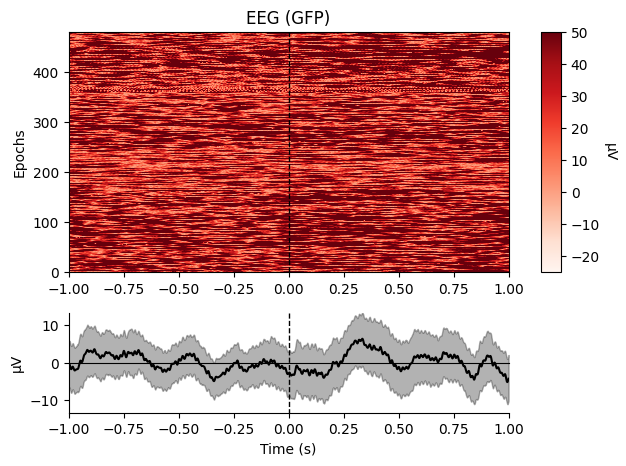

In [24]:
import mne.io
import pandas as pd
from NirsLabProject.utils import general_utils as utils
from NirsLabProject.utils import plotting
from NirsLabProject.config.consts import *
import numpy as np


# subject = Subject(subject_name, False, 'xgb_full_f14_s12_b_V3.pkl')
subj = '402'
channel_name = 'LAH1'
channel_raw = mne.io.read_raw('../data/raw_data/p402.edf').pick(channel_name)
all_spikes = pd.read_csv('../data/products/p402/bipolar_model/features/p402_flat_features.csv')
channel_spikes = all_spikes[all_spikes['channel'] == channel_name]
spikes = channel_spikes['timestamp'].to_numpy().reshape(-1, 1)
zeros = np.zeros((spikes.shape[0], 2), dtype=int)
events = np.hstack((spikes, zeros)).astype(int)
    # indices = np.arange(spikes.shape[0]).reshape(-1, 1)
    # spikes[:, -1] = indices[:, 0]
    # spikes = spikes[spikes[:, 0] != spikes[0, 0]]
epochs =  mne.Epochs(channel_raw, events, tmin=-1, tmax=1)
# epochs = utils.create_epochs(channel_raw, channel_spikes['timestamp'].to_numpy().reshape(-1, 1), -1, 1)
fig = epochs.plot_image(
    vmin=-25,
    vmax=50,
)[0]
# plotting.create_ERP_plot(subject, channel_raw, channel_spikes_indexes, channel_name)


In [16]:
channel_spikes['timestamp'].values.shape

(480,)

In [20]:
channel_spikes['timestamp'].to_numpy().reshape(-1, 1).shape

(480, 1)